In [1]:
# Extract keyords and important topics
# Wordcloud to show the ones that occur the most often
# Visualizations between employee title, tenure, department and the rating t

In [2]:
# Heatmap on a map of the world for grades by location
# Extract the top N positives and negative points that come up in reviews

In [3]:
# General sentiment about the company - different segments of the employee population.

# > What are the segments of people we are interested in? Everyone? Mangers and up?
# > What do we want to know about them? How they feel about the company
# > Why do they feel that way? - Topic Extraction and Clustering
# > How has this changed through time? Were people giving better reviews in 2018?

In [4]:
import pandas as pd
import numpy as np

In [6]:
# Import dataset
df = pd.read_csv("Data.csv", index_col = 0)
df.pop('Unnamed: 8')
df.pop('Unnamed: 9')
df.head()

,Title,Rating,Designation,Pros,Cons,Date,Position
0,Great Culture and Company That Cares,4,Current Employee,Not much politics and very few ego's. Everyone...,Need to focus on career growth and promoting w...,2021,"Senior Corporate Recruiter in Troy, MI"
1,Shaping the Future of Mobility!,5,"Current Employee, more than 1 year","Global Work Environment, Cutting Edge Technolo...",None to mention at this time.,2021,"Program Manager in Dublin, Dublin"
2,Lots of potential- getting there,4,"Current Employee, more than 1 year",A very fast paced environment - you definitely...,Training and coaching could be better- high ex...,2021,"SCM in Dublin, Dublin"
3,Alright but not the best,3,"Current Employee, more than 1 year","Excellent office, good staff, good pay, good b...","Dis organised, office politics at mid/top leve...",2021,"Business Analyst in Dublin, Dublin"
4,Aptiv,3,Current Employee,It is one of the leaders in the automotive ind...,"High pressure for hitting numbers, it is more ...",2020,"Supply Chain in Dublin, Dublin"


### Preprocessing
        Text cleaning and preprocessing before analysis

In [7]:
# Convert reviews to string format
df['Pros'] = df['Pros'].astype(str)
df['Cons'] = df['Cons'].astype(str)

In [8]:
#Drop any null values
df = df[~df["Pros"].isnull()]
df = df[~df["Cons"].isnull()]


In [9]:
# Combine the different review columns
def combined_features(row):
    return row['Title'] + ' '+ row['Pros'] + ' '+ row['Cons']
df['all_features'] = df.apply(combined_features, axis=1)
df.head()

,Title,Rating,Designation,Pros,Cons,Date,Position,all_features
0,Great Culture and Company That Cares,4,Current Employee,Not much politics and very few ego's. Everyone...,Need to focus on career growth and promoting w...,2021,"Senior Corporate Recruiter in Troy, MI",Great Culture and Company That Cares Not much ...
1,Shaping the Future of Mobility!,5,"Current Employee, more than 1 year","Global Work Environment, Cutting Edge Technolo...",None to mention at this time.,2021,"Program Manager in Dublin, Dublin",Shaping the Future of Mobility! Global Work En...
2,Lots of potential- getting there,4,"Current Employee, more than 1 year",A very fast paced environment - you definitely...,Training and coaching could be better- high ex...,2021,"SCM in Dublin, Dublin",Lots of potential- getting there A very fast p...
3,Alright but not the best,3,"Current Employee, more than 1 year","Excellent office, good staff, good pay, good b...","Dis organised, office politics at mid/top leve...",2021,"Business Analyst in Dublin, Dublin","Alright but not the best Excellent office, goo..."
4,Aptiv,3,Current Employee,It is one of the leaders in the automotive ind...,"High pressure for hitting numbers, it is more ...",2020,"Supply Chain in Dublin, Dublin",Aptiv It is one of the leaders in the automoti...


### Data Analysis

In [10]:
# Adding the length of the review and the word count of each review
df['review_len'] = df['all_features'].astype(str).apply(len)
df['word_count'] = df['all_features'].apply(lambda x: len(str(x).split()))
df['Pros_len'] = df['Pros'].astype(str).apply(len)
df['Cons_len'] = df['Cons'].astype(str).apply(len)

In [11]:
# Use textblob library to check for polarity
# Counts positive and negative words and determines the polarity (-1, 1)
from textblob import TextBlob, Word, Blobber
df['polarity'] = df['all_features'].map(lambda text: TextBlob(text).sentiment.polarity)
df.head()

,Title,Rating,Designation,Pros,Cons,Date,Position,all_features,review_len,word_count,Pros_len,Cons_len,polarity
0,Great Culture and Company That Cares,4,Current Employee,Not much politics and very few ego's. Everyone...,Need to focus on career growth and promoting w...,2021,"Senior Corporate Recruiter in Troy, MI",Great Culture and Company That Cares Not much ...,342,58,173,131,0.193286
1,Shaping the Future of Mobility!,5,"Current Employee, more than 1 year","Global Work Environment, Cutting Edge Technolo...",None to mention at this time.,2021,"Program Manager in Dublin, Dublin",Shaping the Future of Mobility! Global Work En...,141,20,79,29,-0.025000
2,Lots of potential- getting there,4,"Current Employee, more than 1 year",A very fast paced environment - you definitely...,Training and coaching could be better- high ex...,2021,"SCM in Dublin, Dublin",Lots of potential- getting there A very fast p...,531,89,379,118,0.188991
3,Alright but not the best,3,"Current Employee, more than 1 year","Excellent office, good staff, good pay, good b...","Dis organised, office politics at mid/top leve...",2021,"Business Analyst in Dublin, Dublin","Alright but not the best Excellent office, goo...",160,25,53,81,0.616667
4,Aptiv,3,Current Employee,It is one of the leaders in the automotive ind...,"High pressure for hitting numbers, it is more ...",2020,"Supply Chain in Dublin, Dublin",Aptiv It is one of the leaders in the automoti...,300,53,85,208,0.100278


array([[<AxesSubplot:title={'center':'review_len'}>,
        <AxesSubplot:title={'center':'word_count'}>],
       [<AxesSubplot:title={'center':'polarity'}>, <AxesSubplot:>]],
      dtype=object)

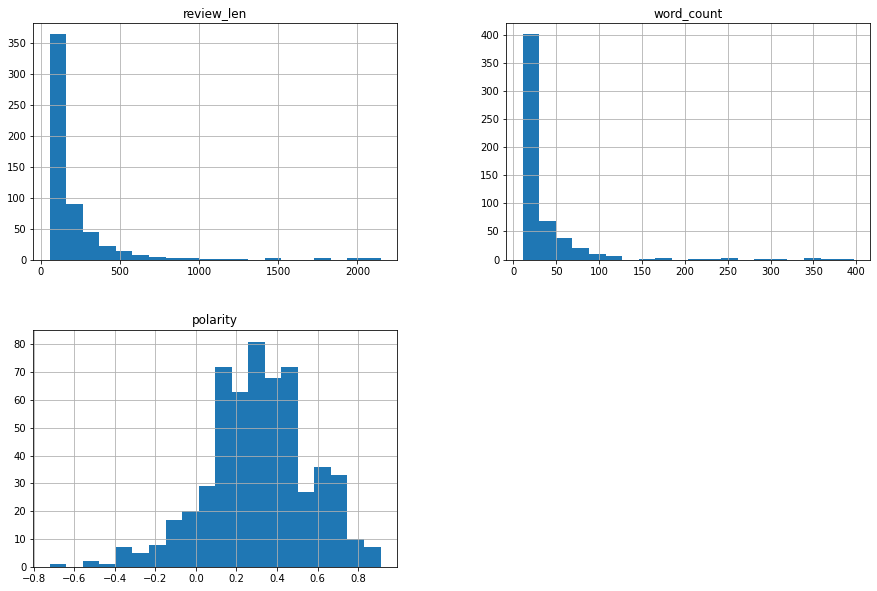

In [12]:
# Distribution of the word count, review lengh and polarity
df[["review_len", "word_count", "polarity"]].hist(bins=20, figsize=(15, 10))

# Distribution of review length and word count is similar
# Majority polarity is above 0 - more reviews have a positive sentiment

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

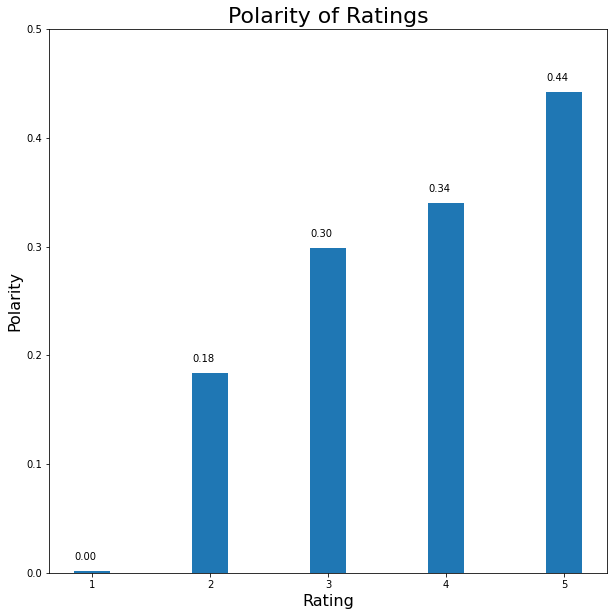

In [14]:
# Mean polarity keeps going up with the higher rating
mean_pol = df.groupby('Rating')['polarity'].agg([np.mean])
mean_pol.columns = ['mean_polarity']
fig, ax = plt.subplots(figsize=(10, 10))
plt.bar(mean_pol.index, mean_pol.mean_polarity, width=0.3)
#plt.gca().set_xticklabels(mean_pol.index, fontdict={'size': 14})
    
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+0.01, str("{:.2f}".format(i.get_height())))
plt.title("Polarity of Ratings", fontsize=22)
plt.ylabel("Polarity", fontsize=16)
plt.xlabel("Rating", fontsize=16)
plt.ylim(0, 0.5)
plt.show()

# ower ratings still not near -1

In [15]:
import seaborn as sns

Rectangle(xy=(-0.4, 0), width=0.8, height=202, angle=0)
202
Rectangle(xy=(0.6, 0), width=0.8, height=138, angle=0)
138
Rectangle(xy=(1.6, 0), width=0.8, height=114, angle=0)
114
Rectangle(xy=(2.6, 0), width=0.8, height=58, angle=0)
58
Rectangle(xy=(3.6, 0), width=0.8, height=47, angle=0)
47


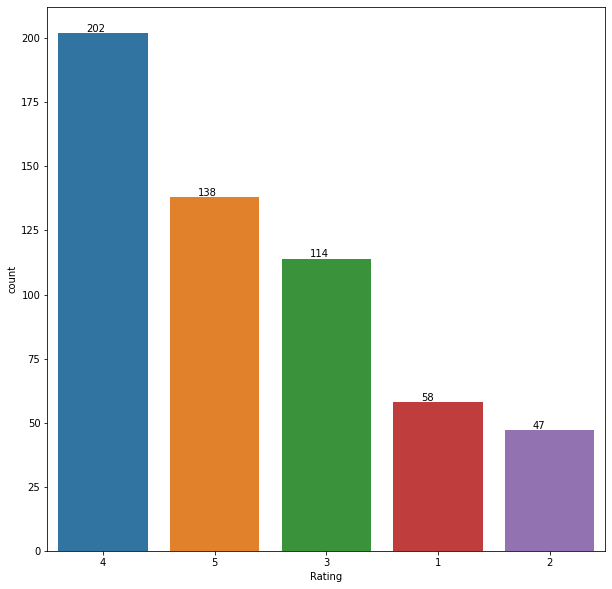

In [16]:
# Count of the reviews for each rating
# Most reviews have a rating of 4
plt.figure(figsize=(10,10))

ax = sns.countplot(x=df['Rating'], data=df, order=df['Rating'].value_counts().index)
for p, label in zip(ax.patches, df['Rating'].value_counts()):
    print(p)
    print(label)
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

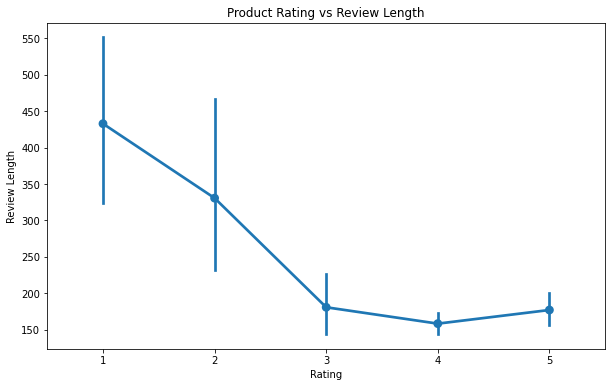

In [17]:
# Length of the review vs the rating
# Check of the review length changes with rating
# Hogher ratings have shorter reviews
plt.figure(figsize=(10, 6))
sns.pointplot(x = "Rating", y = "review_len", data = df)
plt.xlabel("Rating")
plt.ylabel("Review Length")
plt.title("Product Rating vs Review Length")
plt.show()

In [18]:
mask = (df['Rating'] == 1) | (df['Rating'] == 2)
df_rating_12 = df[mask]
mask = (df['Rating'] == 4) | (df['Rating'] == 5) | (df['Rating'] == 3)
df_rating_345 = df[mask]

In [19]:
print(len(df_rating_12))
print(len(df_rating_345))

105
454


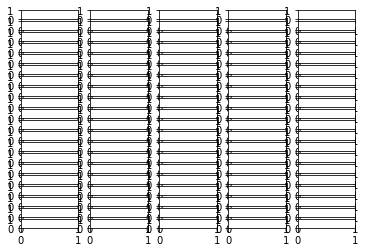

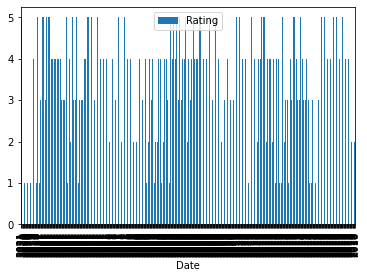

In [35]:
# Average rating by year

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(20, 5)

df.plot(kind='bar', x='Date', y='Rating')
plt.show()

c:\users\xj30hh\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\xj30hh\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


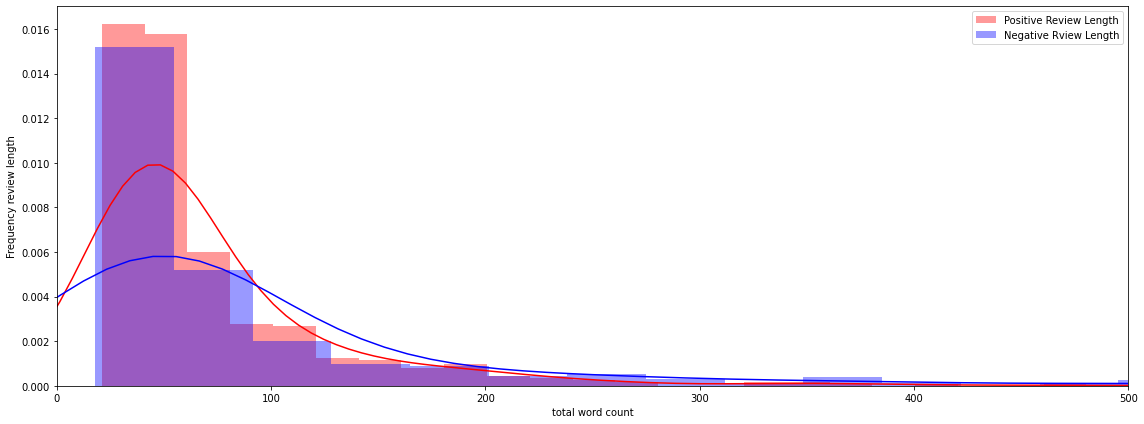

In [21]:
fig, ax = plt.subplots(figsize=(16, 6), tight_layout=True)

sns.distplot(df.Pros_len, color="red", label='Positive Review Length')
sns.distplot(df.Cons_len, color='blue', label='Negative Rview Length')
ax.legend()
ax.set(xlabel='total word count', ylabel='Frequency review length')
plt.xlim(0, 500)
plt.show()

